#using Logistic Regression for Sentiment Analysis as a test


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

In [ ]:

df = pd.read_csv('/content/user_reviews.csv')


In [ ]:
df.head(3)

,product_id,product_name,product_fullName,product_url,text,cleaned_text,review_date,year,review_rating,category
0,itmfa5j4jcma4px6,intel-i7-3770,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Delightful Seems to be performing as expected....,"['delightful', 'seems', 'performing', 'expecte...","Aug, 2022",2022,positive,1
1,itmfa5j4jcma4px6,intel-i7-3770,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,"Fabulous! Okay so, at first i was worried as h...","['fabulous', 'okay', 'first', 'worried', 'hell...","Sep, 2022",2022,positive,1
2,itmfa5j4jcma4px6,intel-i7-3770,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Terrific Pacaging was not good and obviously i...,"['terrific', 'pacaging', 'good', 'obviously', ...","Oct, 2022",2022,positive,1


In [ ]:

from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['category']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
# @title tdfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500, sublinear_tf=True, ngram_range=(1,2))
X_train = vectorizer.fit_transform(x_train).toarray()
X_test = vectorizer.transform(x_test).toarray()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
char_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 5), max_features=2600, min_df=5)
X_train_char = char_vectorizer.fit_transform(x_train)
X_test_char = char_vectorizer.transform(x_test)

syllable_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), max_features=2600, min_df=5)
X_syllable_train = syllable_vectorizer.fit_transform(x_train)
X_syllable_test = syllable_vectorizer.transform(x_test)

from scipy.sparse import hstack
X_train = hstack([X_train_char, X_syllable_train])
X_test = hstack([X_test_char, X_syllable_test])

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Convert x_train to a NumPy array with elements of consistent type and shape
#x_train_array = np.array([np.array(xi) for xi in x_train])

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train) #

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        12
           1       1.00      0.96      0.98       375

    accuracy                           0.96       387
   macro avg       0.71      0.98      0.79       387
weighted avg       0.98      0.96      0.97       387



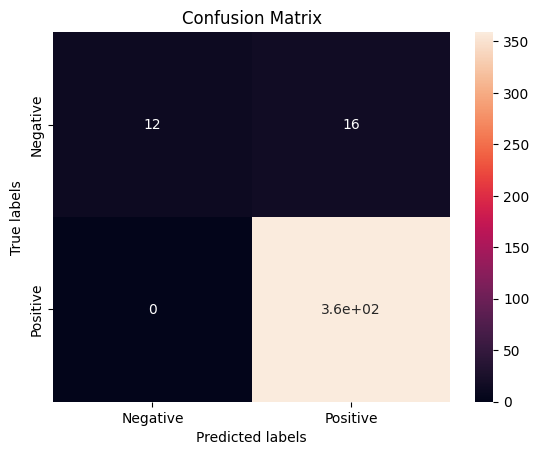

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)  # Annotate cells with values

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()


In [ ]:


from google.colab import drive

model_path = '/content/drive/MyDrive/model/logistic_regression_model.pkl'

import pickle
with open(model_path, 'wb') as f:
  pickle.dump(model, f)
